In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
import json
from wafer_plot import draw_wafer_plot

warnings.filterwarnings('ignore')

In [2]:
def get_single_ret_loss(df, widths, wg_len) -> list:
    wavel = df['wavelength']
    trans = df['transmission_ch1']

    loss = []
    
    for i, v in enumerate(widths):
        wg_tran = []
        for j in range(i*len(wg_len), (i+1)*len(wg_len)):
            x = wavel[j]
            y = trans[j]
            wg_tran.append(get_center_loss(x, y))
    
        coefs = poly.polyfit(wg_len, wg_tran, 1)
        ffit = poly.Polynomial(coefs)
        new_len = np.arange(0.1, 12.5, 0.1)
        loss.append(-coefs[1])
        # w = widths[i]
        
    # plot measured and fitted data
    # fig, axes = plt.subplots(1,1, figsize=(7, 5))
    # ax = axes
    # ax.plot(wg_len, wg_tran, 'o', markersize=5)
    # ax.plot(new_len, ffit(new_len))
    # ax.set_xlabel('Wavelength (nm)')
    # ax.set_ylabel('Transmission (dB)')
    # ax.set_title(f'WG width = {w:.1f} um')
    # print(loss)
    
    return loss

def get_center_loss(x, y) -> float:
    # print(len(x))
    coefs = poly.polyfit(x, y, 12)
    ffit = poly.Polynomial(coefs)
    return ffit(1310)

In [3]:
p_current = Path().resolve().parent
root = p_current / 'results' / 'BO_wafer3_data' /'ridge_loss_test_cells_BO_wafer3'
losses = {}

# Nitride WG
# wg_len = [0.5, 2, 4, 6, 8, 10, 12] # cm
# widths = [0.6, 0.8, 1.0, 1.5, 2.0]

# Ridge WG
wg_len = [1, 2, 3, 4, 5, 6] # cm
widths = [0.3, 0.35, 0.44, 0.6, 0.8, 1.0]

data_dir_gen = sorted(root.glob('reticle*/*.json'))
for d in data_dir_gen:
    df = pd.read_json(d)
    ret = int(df['reticle'][0])
    single_ret_loss = get_single_ret_loss(df, widths, wg_len)
    losses[ret] = single_ret_loss

print(losses)

{0: [1.3304574859993785, 0.7508878367287755, 0.6692018953817228, 0.38239750896713465, 0.2690378708498811, 0.2439217013173862], 1: [1.217505298342022, 0.6765810992036534, 0.5866483971476547, 0.2951119959354381, 0.21032871327229882, 0.13791451965059504], 10: [1.2522938523973723, 0.6456627709524959, 0.4885981219155431, 0.2136182750974374, 0.11578053406306589, 0.05150577851704051], 11: [1.2475119062832414, 0.5980280671800879, 0.460866736514227, 0.2042687880141384, 0.12652700969150946, 0.035036979402813445], 12: [1.1917056631829044, 0.5893267056505587, 0.4516763559409548, 0.21211615587983754, 0.13409710909638892, 0.07496004564953627], 13: [1.1325669041701716, 0.509476349609237, 0.4135302530867704, 0.17120970253433548, -0.14151531271636658, 0.06229530487741573], 14: [1.1683382928371422, 0.5555322710690737, 0.4298925971346235, 0.19565857691424174, 0.0950158481086991, 0.04399441033601704], 15: [1.1873559483460006, 0.557071497184887, 0.441827834663645, 0.1887800793562605, 0.08952324653509885, 0

{0: 0.2439217013173862, 1: 0.13791451965059504, 10: 0.05150577851704051, 11: 0.035036979402813445, 12: 0.07496004564953627, 13: 0.06229530487741573, 14: 0.04399441033601704, 15: 0.045348107814787236, 16: 0.020554988724842658, 17: 0.04713335846151588, 18: 0.015446936232701894, 19: -0.010666612908245391, 2: 0.15680147877761164, 20: -0.020456684593644296, 21: 0.07816476438726587, 22: 0.07777242389108327, 23: 0.096245643070764, 24: 0.06388093062809508, 25: 0.05059279959116668, 26: -0.029177939891817425, 27: 0.03111885019710996, 28: 0.08784073463507912, 29: 0.030246099403925055, 3: 0.22264930573957079, 30: 0.051553057772770444, 31: 0.05117222709314916, 32: 0.10425642111471642, 33: 0.08421074875763318, 34: -0.009868853858540257, 35: 0.08853276137794654, 36: 0.05235505380800705, 37: 0.036184198515755155, 38: 0.009831240340799685, 39: 0.09173304608889911, 4: 0.027992779867988694, 40: 0.11658482210976598, 41: 0.16191464236804326, 42: 0.005801358978662008, 43: 0.028189543315342215, 44: -0.007820

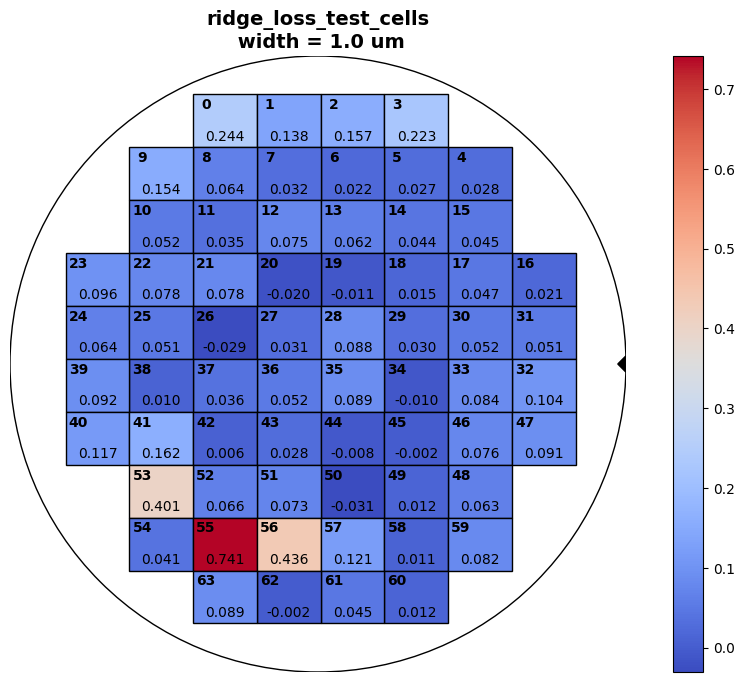

In [18]:
w = 1.0
if w in widths:
    loss = {ret: l[widths.index(w)] for ret, l in losses.items()}

print(loss)
# loss.pop(55)

# get a wafer plot
cell_name = str(df['test_cell'][0])
draw_wafer_plot(data=loss, title=f'{cell_name}\n width = {w} um')

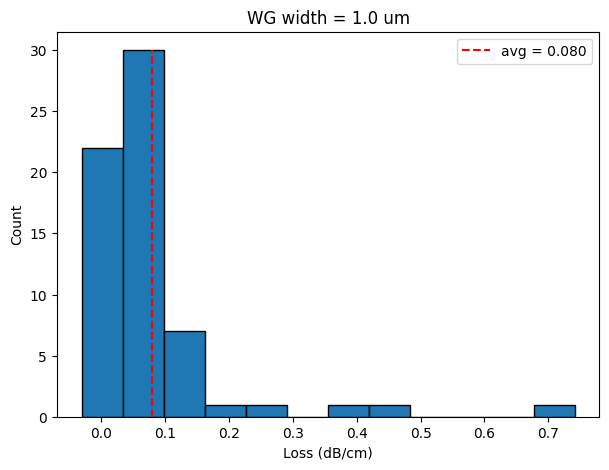

In [20]:
# Plot histograms
loss_list = list(loss.values())

fig, ax = plt.subplots(1,1, figsize=(7, 5))
ax.hist(loss_list, bins=12, edgecolor='k')
l_avg = np.average(loss_list)
ax.vlines(l_avg, 0, 30, 'r', '--', label=f'avg = {l_avg:.3f}')
ax.set_xlabel('Loss (dB/cm)')
ax.set_ylabel('Count')
# ax.set_ylim([0, 19])
ax.set_title(f'WG width = {w} um')
ax.legend()

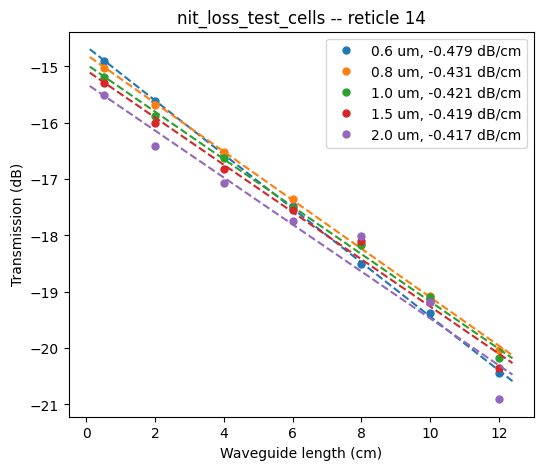

In [39]:
# Plot of the linear fitting of 7 different lengths for 5 different widths
df = pd.read_json(root / 'reticle14' / 'nit_loss_test_Cells.json')

wavel = df['wavelength']
trans = df['transmission_ch1']

wg_len = [0.5, 2, 4, 6, 8, 10, 12] # cm
widths = [0.6, 0.8, 1.0, 1.5, 2.0]
wg_trans = []
loss_fit = []

for i, v in enumerate(widths):
    wg_tran = []
    for j in range(i*len(wg_len), (i+1)*len(wg_len)):
        x = wavel[j]
        y = trans[j]
        wg_tran.append(get_center_loss(x, y))

    coefs = poly.polyfit(wg_len, wg_tran, 1)
    ffit = poly.Polynomial(coefs)

    wg_trans.append(wg_tran)
    loss_fit.append((coefs, ffit))
    
#plot measured and fitted data
new_len = np.arange(0.1, 12.5, 0.1)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, ax = plt.subplots(1,1, figsize=(6, 5))
for i, w, wg_tran, fit in zip(range(len(widths)), widths, wg_trans, loss_fit):
    ax.plot(wg_len, wg_tran, 'o', color=colors[i], markersize=5, 
            label=f'{w} um, {fit[0][1]:.3f} dB/cm')
    ax.plot(new_len, fit[1](new_len), '--', color=colors[i])
ax.set_xlabel('Waveguide length (cm)')
ax.set_ylabel('Transmission (dB)')
ax.set_title('nit_loss_test_cells -- reticle 14')
ax.legend()
plt.show()